### Example 1

ODE: $\dfrac{dy}{dx} = y - \dfrac{2x}{y}$

Exact solution: $y^2 = 2x + 1$

$x \in [0, 1]$, $h = 0,25$

$y(0) = 1$

x,Y(exact),Y(numeric),E
0.25,1.224744871391589,1.25,2.0620726159657607%
0.5,1.4142135623730951,1.4625,3.414366748532572%
0.75,1.5811388300841898,1.657184829059829,4.809571274117033%
1.0,1.7320508075688772,1.8451936642561264,6.532305876526664%


(None, <matplotlib.legend.Legend at 0x243fcfcb848>)

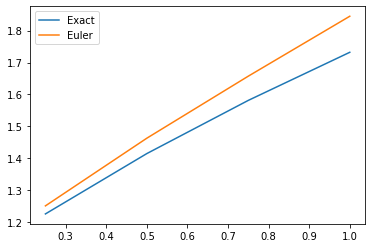

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def put_values():
    global x, y, n, h, x0, y0, xk, yk
    
    h = 0.25
    x0 = 0
    xf = 1
    n = int((xf - x0)/h)
    x = []
    y = []
    y0 = 1
    xk = x0
    yk = y0
    
    return Euler(x, y, n, h, x0, y0, xk, yk)

def Euler(x, y, n, h, x0, y0, xk, yk):
    
    for i in range(1, n + 1):
        x.append(xk + h)
        dy = yk - (2*xk)/yk
        y.append(yk + h*dy)
        xk = x[i - 1]
        yk = y[i - 1]
    
    return [x, y]

def exact_soluction():
    x_values = put_values()[0]
    y_results = []
    for i in x:
        y = np.sqrt(2*i + 1)
        y_results.append(y)
    return [x_values, y_results]

def relative_error():
    error = []
    for i,j in zip(y_exact, y_euler):
        error.append(str(np.abs(100 - (j * 100)/i)) + "%")
    return error

def data_frame_and_graphic():
    global x_euler, y_euler, x_exact, y_exact
    
    x_euler, y_euler = put_values()
    x_exact, y_exact = exact_soluction()
    error = relative_error()
    elements_df = [x_exact, y_exact, y_euler,error]
    elements_df_np = np.array(elements_df).T
    elements_df = elements_df_np.tolist()
    dataframe = pd.DataFrame(elements_df, columns = ["x", "Y(exact)", "Y(numeric)", "E"]).style.hide_index()
    plt.plot(x_exact, y_exact)
    plt.plot(x_euler, y_euler)
    return display(dataframe), plt.legend(['Exact','Euler'], loc = 0)

data_frame_and_graphic()

___
### Example 2

ODE: $\dfrac{dy}{dx} = yx^2 - y$

Exact Solution: $y = \dfrac{e^{\dfrac{x^3}{3}}}{e^x}$

$x \in [0, 2]$ and $h = 0,2$

$y(0) = 1$

x,Y(exact),Y(numeric),E
0.25,0.7828676186742903,0.75,4.198362263334943%
0.5,0.6323366621862497,0.57421875,9.190976209620999%
0.75,0.5436905695130004,0.466552734375,14.187819223551188%
1.0,0.513417119032592,0.4155235290527344,19.067067760481763%


(None, <matplotlib.legend.Legend at 0x243fd102d08>)

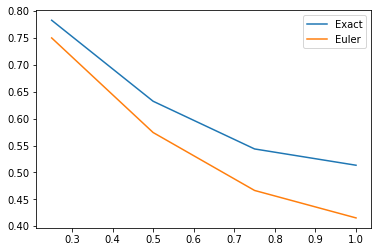

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

def put_values():
    global x, y, n, h, x0, y0, xk, yk
    
    h = 0.25
    x0 = 0
    xf = 1
    n = int((xf - x0)/h)
    x = []
    y = []
    y0 = 1
    xk = x0
    yk = y0
    
    return Euler(x, y, n, h, x0, y0, xk, yk)

def Euler(x, y, n, h, x0, y0, xk, yk):

    for i in range(1, n + 1):
        x.append(xk + h)
        dy = yk*(xk**2) - yk #EDO
        y.append(yk + h*dy)
        xk = x[i - 1]
        yk = y[i - 1]
    
    return [x, y]

def exact_soluction():
    x_values = put_values()[0]
    y_results = []
    for i in x:
        
        y = (1/(math.e**i))*(math.e**((i**3)/(3)))
        y_results.append(y)
    return [x_values, y_results]

def relative_error():
    error = []
    for i,j in zip(y_exact, y_euler):
        error.append(str(np.abs(100 - (j * 100)/i)) + "%")
    return error

def data_frame_and_graphic():
    global x_euler, y_euler, x_exact, y_exact
    
    x_euler, y_euler = put_values()
    x_exact, y_exact = exact_soluction()
    error = relative_error()
    elements_df = [x_exact, y_exact, y_euler,error]
    elements_df_np = np.array(elements_df).T
    elements_df = elements_df_np.tolist()
    dataframe = pd.DataFrame(elements_df, columns = ["x", "Y(exact)", "Y(numeric)", "E"]).style.hide_index()
    plt.plot(x_exact, y_exact)
    plt.plot(x_euler, y_euler)
    return display(dataframe), plt.legend(['Exact','Euler'], loc = 0)

data_frame_and_graphic()